# Lab 9: The Long-Run Causal Effects of HOLC “Redlining”

## Methods/concepts: differences in differences; parallel trends assumption; diff in diff versus RDD

**Name:** Shreya Chaturvedi

**Email:** shreyachaturvedi@hks.harvard.edu

**HUID:** 31575036

**Lab:** Thursday 3pm at HKS

**Date:** April 22nd 2024

**LAB DESCRIPTION**

In this lab, you will use **differences in differences** and
**regression discontinuity design** to study the long-run *causal
effect* of the Home Owners’ Loan Corporation (HOLC) “Redlining” maps on
homeownership rates using data from 1910-2010.

Our empirical strategy will be based on the following historical
details. In the 1930s, the HOLC did not draw maps for every city in the
United States. In particular, cities whose populations in 1930 were less
than 40,000 residents were not mapped. Most (but not all) cities with
1930s populations above 40,000 were mapped. We will focus on 53 cities
with 1930s populations between 30,000 and 50,000. The 1930 Census took
place before the HOLC maps were drawn, so we have 1910, 1920, and 1930
Census data before the HOLC maps were drawn, and 1940 to 2010 Census
data after the HOLC maps were drawn. For more details on the variables
included in these data, see [Table 1](#Table-A).

A list and description of each of the R
commands needed for questions 6 through 9 on this lab are contained in
[Table 2](#Table-2).

## **QUESTIONS**

1.  Start with a graphical **regression discontinuity design (RDD)**
    analysis:

    1. Draw a binned scatter plot to show that the likelihood of having
        a HOLC map drawn changes discontinuously if a city’s 1930
        population exceeds 40,000 residents. Restrict the data to 1930.
        Include your graph in your solution write up.
    2. Draw binned scatter plots to test for smoothness of 2-3 city
        characteristics measured in a pre-treatment year (i.e., 1910,
        1920, or 1930) across the 40,000 resident threshold. Include
        your graphs in your solution write up.
    3. What do you conclude about the validity of the regression
        discontinuity research design using the 40,000 threshold based
        on your graphs? Explain clearly what you see in your graphs that
        leads you to your conclusion.
    4. Draw a binned scatter plot to evaluate whether homeownership
        rates pooling all the data from 1940 to 2010 changes
        discontinuously if a city’s 1930 population exceeds 40,000
        residents. Include your graph in your solution write up.

    city_m             city_id           year         pop_1930    
 Length:581         Min.   : 1.00   Min.   :1910   Min.   :30729  
 Class :character   1st Qu.:14.00   1st Qu.:1930   1st Qu.:33362  
 Mode  :character   Median :27.00   Median :1960   Median :40108  
                    Mean   :27.04   Mean   :1960   Mean   :39400  
                    3rd Qu.:40.00   3rd Qu.:1990   3rd Qu.:44512  
                    Max.   :53.00   Max.   :2010   Max.   :48764  
                                                                  
    ownhome          holc_map      median_gross_rent median_house_value
 Min.   :0.1790   Min.   :0.0000   Min.   :  76.07   Min.   :  7783    
 1st Qu.:0.4319   1st Qu.:0.0000   1st Qu.: 354.98   1st Qu.: 59585    
 Median :0.5289   Median :1.0000   Median : 494.76   Median : 78493    
 Mean   :0.5132   Mean   :0.5112   Mean   : 503.93   Mean   :104468    
 3rd Qu.:0.6020   3rd Qu.:1.0000   3rd Qu.: 602.94   3rd Qu.:109743    
 Max.   :0.7400   Max.   :1.0000

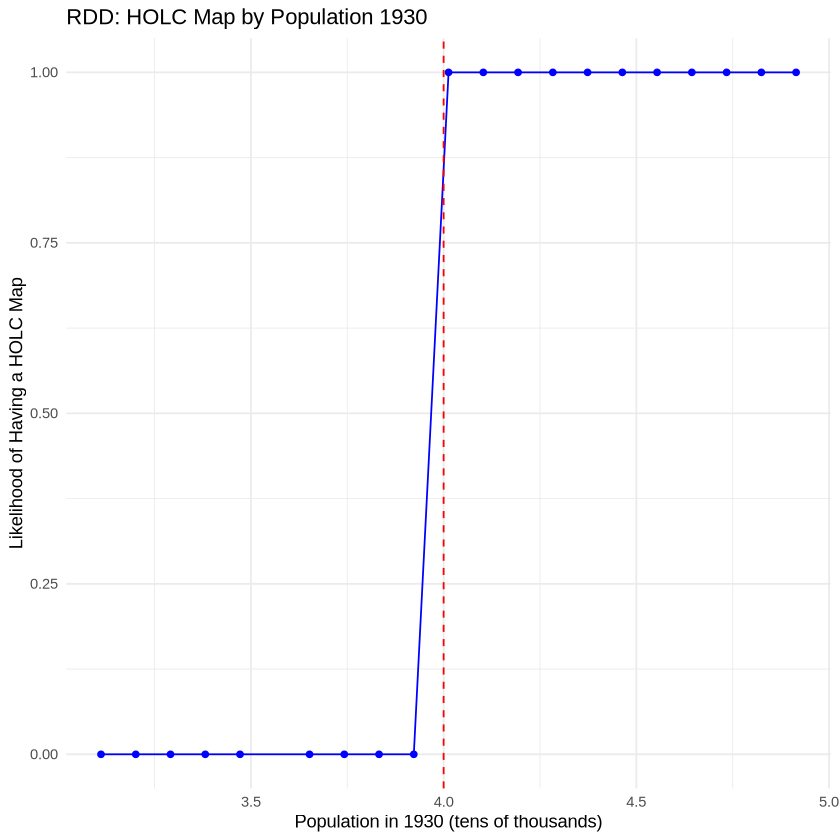

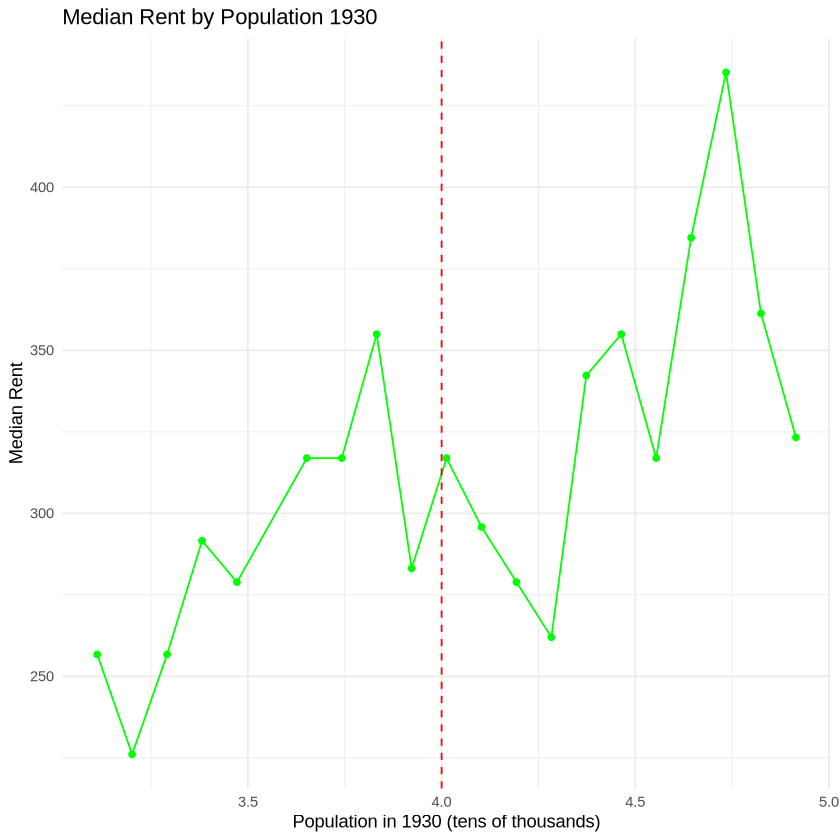

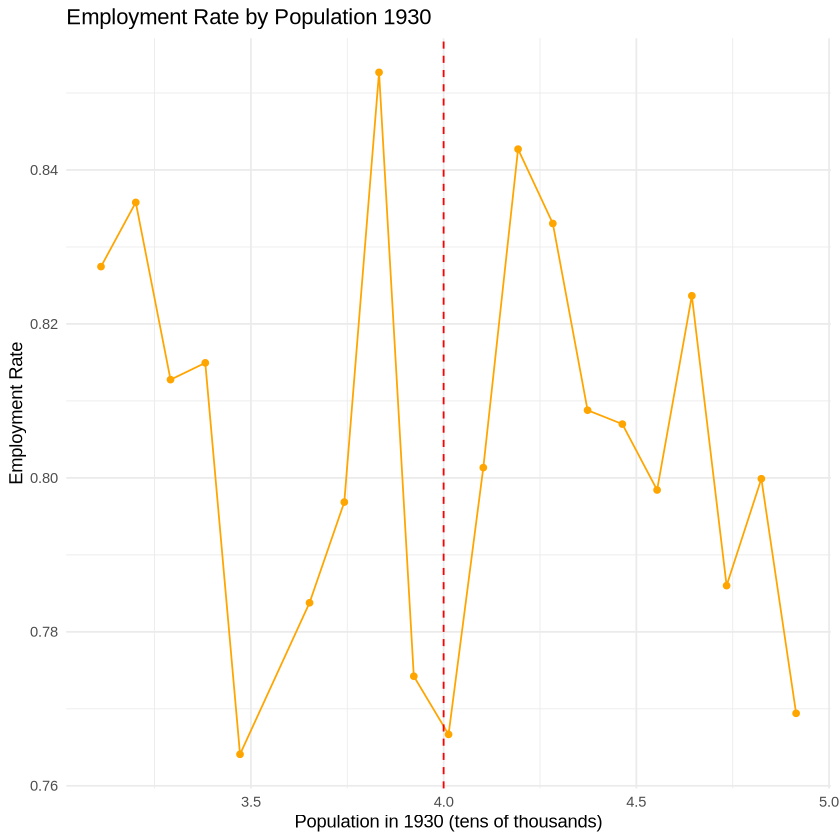

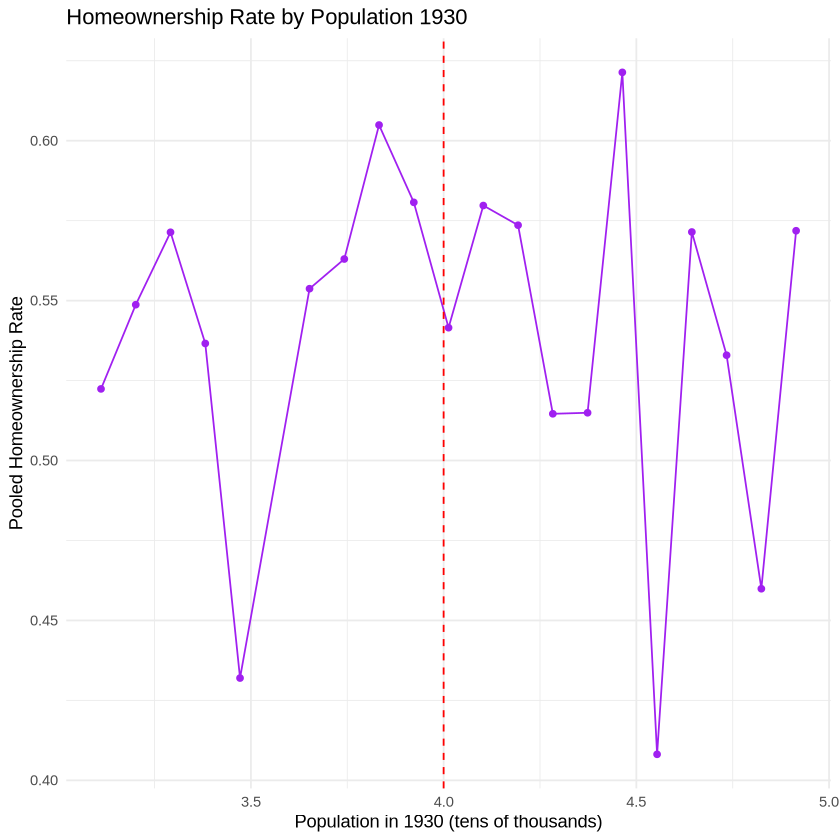

In [6]:
#-------------------------------------------------------------------------------
# Data set up
#-------------------------------------------------------------------------------

#clear the workspace
rm(list=ls()) # removes all objects from the environment 

#Install and load haven package
if (!require(haven)) install.packages("haven"); library(haven) 
if (!require(dplyr)) install.packages("dplyr"); library(dplyr)
library(ggplot2)
library(tidyr)

#Load stata data set
download.file("https://raw.githubusercontent.com/ekassos/ec50_s24/main/holc.dta", "holc.dta", mode = "wb")
dat <- read_dta("holc.dta")

#Report detailed information on all variables
summary(dat)

# QUESTION 1 Code
dat_1930 <- dat[dat$year == 1930 & complete.cases(dat[, c('holc_map', 'pop_1930')]), ]
dat_1930$pop_10k <- dat_1930$pop_1930 / 10000

## Part A
ggplot(dat_1930, aes(x = pop_10k, y = holc_map)) +
  stat_summary_bin(fun = "mean", bins = 20, geom = "point", color = "blue") +
  stat_summary_bin(fun = "mean", bins = 20, geom = "line", color = "blue") +
  geom_vline(xintercept = 4, linetype="dashed", color = "red") +
  labs(x = 'Population in 1930 (tens of thousands)', y = 'Likelihood of Having a HOLC Map', title = 'RDD: HOLC Map by Population 1930') +
  theme_minimal()

## Part B
ggplot(dat_1930, aes(x = pop_10k, y = median_rent, group = 1)) +
  stat_summary_bin(fun = "mean", bins = 20, geom = "point", color = "green") +
  stat_summary_bin(fun = "mean", bins = 20, geom = "line", color = "green") +
  geom_vline(xintercept = 4, linetype="dashed", color = "red") +
  labs(x = 'Population in 1930 (tens of thousands)', y = 'Median Rent', title = 'Median Rent by Population 1930') +
  theme_minimal()

ggplot(dat_1930, aes(x = pop_10k, y = employment, group = 1)) +
  stat_summary_bin(fun = "mean", bins = 20, geom = "point", color = "orange") +
  stat_summary_bin(fun = "mean", bins = 20, geom = "line", color = "orange") +
  geom_vline(xintercept = 4, linetype="dashed", color = "red") +
  labs(x = 'Population in 1930 (tens of thousands)', y = 'Employment Rate', title = 'Employment Rate by Population 1930') +
  theme_minimal()


## Part D: Homeownership Rates Pooling from 1940 to 2010
# Pooling homeownership data from 1940 to 2010
dat_homeownership <- dat %>%
  filter(year >= 1940, year <= 2010) %>%
  group_by(pop_1930) %>%
  summarise(average_ownership = mean(ownhome, na.rm = TRUE)) %>%
  mutate(pop_10k = pop_1930 / 10000)

ggplot(dat_homeownership, aes(x = pop_10k, y = average_ownership)) +
  stat_summary_bin(fun = "mean", bins = 20, geom = "point", color = "purple") +
  stat_summary_bin(fun = "mean", bins = 20, geom = "line", color = "purple") +
  geom_vline(xintercept = 4, linetype="dashed", color = "red") +
  labs(x = 'Population in 1930 (tens of thousands)', y = 'Pooled Homeownership Rate', title = 'Homeownership Rate by Population 1930') +
  theme_minimal()

**Question 1 Answer**

A. Graph as shown above. The HOLC map is only for populations over 40000.

B. Graph on median rent and employment rate for the year 1930 shown above.

C. There is a clear jump in HOLC map indicator as shown in part A. Further, the two covariates have a similar distribution of values (no distinct jump) before and after the threshold. This shows that the RDD assumptions hold in this case. 

D. There is no significant jump at the cutoff, as shown above. 

2.  Next run the following **regression discontinuity design (RDD)**
    regression pooling data for 1940 to 2010. Note that this is the same
    as the regression you ran in Lab 5.

    $${own\_ home}_{i} = \beta_{0} + \ \beta_{\text{RD}}\text{above}_{i} + \beta_{2}{dist\_ from\_ cut}_{i} + \ \beta_{3}\ \text{interaction}_{i} + \upsilon_{i}\ $$

    Here, the dependent variable is the homeownership rate ${own\_ home}_{i}$ in city $i$. The indicator variable $\text{above}_{i}$ is 1 if the city $i$’s 1930 population was more than 40,000 and 0 otherwise. The variable ${dist\_ from\_ cut}_{i} = {pop\_ 1930}_{i} - 40000$ is the difference between city $i$’s 1930 population and the threshold. The variable $\text{interaction}_{i} = \text{above}_{i} \times {dist\_ from\_ cut}_{i}$ equals the product between the indicator $\text{above}_{i}$ and the distance from the threshold ${dist\_ from\_ cut}_{i}$.

    Generate the necessary variables and run this regression. Report and interpret the regression discontinuity estimate ${\widehat{\beta}}_{\text{RD}}$ of the causal effect of the HOLC maps on homeownership rates.

In [10]:
# QUESTION 2 Code

dat$above_i <- ifelse(dat$pop_1930 > 40000, 1, 0)
dat$dist_from_cut_i <- dat$pop_1930 - 40000
dat$interaction_i <- dat$above_i * dat$dist_from_cut_i

# Run the regression model
rdd_model <- lm(ownhome ~ above_i + dist_from_cut_i + interaction_i, data = dat)

# Display the summary of the model
summary(rdd_model)


Call:
lm(formula = ownhome ~ above_i + dist_from_cut_i + interaction_i, 
    data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.274284 -0.066055 -0.000403  0.066019  0.259313 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.752e-01  3.341e-02  14.220   <2e-16 ***
above_i         -3.048e-03  4.249e-02  -0.072    0.943    
dist_from_cut_i  5.763e-06  5.057e-06   1.140    0.257    
interaction_i   -1.044e-05  7.059e-06  -1.479    0.142    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1007 on 102 degrees of freedom
Multiple R-squared:  0.02371,	Adjusted R-squared:  -0.005007 
F-statistic: 0.8256 on 3 and 102 DF,  p-value: 0.4827


**Question 2 Answer**

Based on this analysis, there is no evidence to suggest that the presence of a HOLC map has a significant impact on homeownership rates across the threshold of 40,000 residents. The overall model fit is poor, suggesting that other factors not included in the model might better explain variations in homeownership rates across different cities. This finding highlights the need for further investigation, possibly considering additional variables or alternative modeling approaches.

3.  Now we will turn to a graphical **differences in differences**
    analysis:

    1. Plot average homeownership rates in 1910 through 2010 for cities
        with 1930s populations below the 40,000 population threshold and
        cities above the 40,000 population threshold. Include your graph
        in your solution write up.
    2. Is the *parallel trends identification assumption* plausibly
        satisfied in the data? Explain clearly what you see in the graph
        that leads you to your conclusion.

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


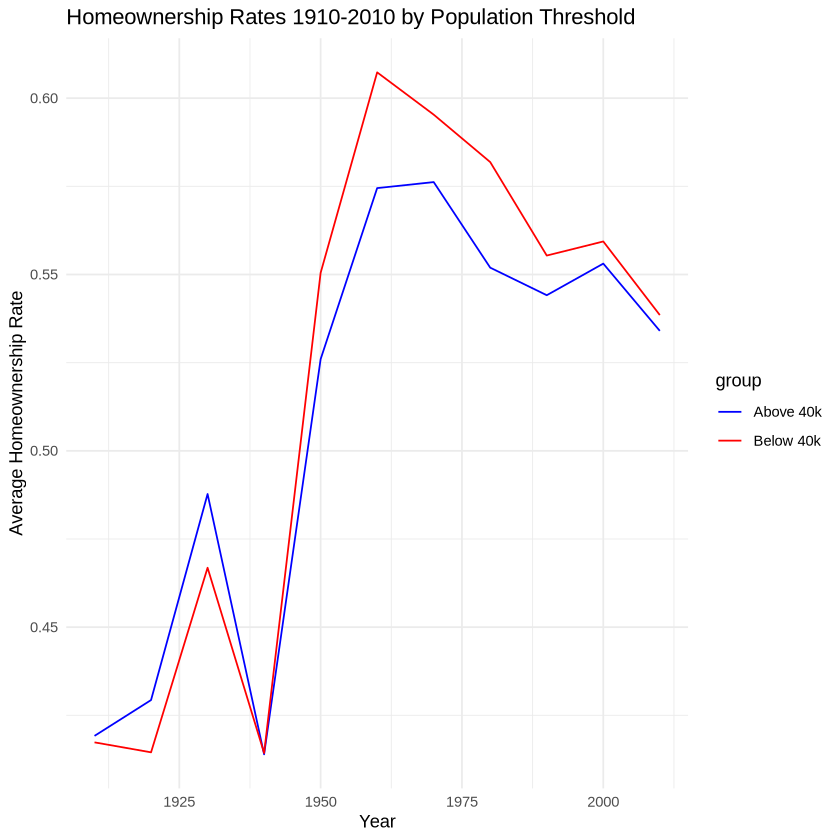

In [9]:
# QUESTION 3 Code
# Filter data for necessary years and compute average homeownership rates
dat_filtered <- dat %>%
  filter(year >= 1910 & year <= 2010) %>%
  mutate(group = ifelse(pop_1930 < 40000, 'Below 40k', 'Above 40k')) %>%
  group_by(year, group) %>%
  summarise(average_ownership = mean(ownhome, na.rm = TRUE))

## Plot: Homeownership Rates Over Time by Population Group
ggplot(dat_filtered, aes(x = year, y = average_ownership, color = group)) +
  geom_line() +
  labs(x = 'Year', y = 'Average Homeownership Rate', title = 'Homeownership Rates 1910-2010 by Population Threshold') +
  theme_minimal() +
  scale_color_manual(values = c("blue", "red"))


**Question 3 Answer**


The graph suggests that before the treatment, the homeownership rates for cities above and below the 40,000 population threshold track each other closely, indicating that the parallel trends assumption for the pre-treatment period is plausibly satisfied. After the treatment, the two groups begin to diverge, which is consistent with the expectation that the treatment had an effect. 

4.  Now calculate and report the following conditional means:

    - ${\overline{Y}}_{T,Pre}$ = mean home ownership rate in the years 1910 to 1930 in the *treatment group* cities with 1930 population above 40,000 residents
    - ${\overline{Y}}_{T,Post}$ = mean home ownership rate in the years 1940 to 1960 in the *treatment group* cities with 1930 population above 40,000 residents
    - ${\overline{Y}}_{C,Pre}$ = mean home ownership rate in the years 1910 to 1930 in the *control group* cities with 1930 population below 40,000 residents
    - ${\overline{Y}}_{C,Post}$ = mean home ownership rate in the years 1940 to 1960 in the *control group* cities with 1930 population below 40,000 residents
    
    <br>
    
    Use these averages to calculate the impact of the HOLC “Redlining” maps on home ownership rates using **differences in differences**. Include your calculation in your solution write up.

In [10]:
# QUESTION 4 Code
# Treatment Group (Above 40k residents)
Y_T_Pre <- dat %>%
  filter(pop_1930 > 40000, year >= 1910, year <= 1930) %>%
  summarise(mean_homeownership_pre = mean(ownhome, na.rm = TRUE))

Y_T_Post <- dat %>%
  filter(pop_1930 > 40000, year >= 1940, year <= 1960) %>%
  summarise(mean_homeownership_post = mean(ownhome, na.rm = TRUE))

# Control Group (Below 40k residents)
Y_C_Pre <- dat %>%
  filter(pop_1930 <= 40000, year >= 1910, year <= 1930) %>%
  summarise(mean_homeownership_pre = mean(ownhome, na.rm = TRUE))

Y_C_Post <- dat %>%
  filter(pop_1930 <= 40000, year >= 1940, year <= 1960) %>%
  summarise(mean_homeownership_post = mean(ownhome, na.rm = TRUE))

# Calculate Differences in Differences Estimator
DiD <- (Y_T_Post$mean_homeownership_post - Y_T_Pre$mean_homeownership_pre) -
        (Y_C_Post$mean_homeownership_post - Y_C_Pre$mean_homeownership_pre)

# Output the results
print(paste("Mean Homeownership Rate for Treatment Group (Pre): ", Y_T_Pre$mean_homeownership_pre))
print(paste("Mean Homeownership Rate for Treatment Group (Post): ", Y_T_Post$mean_homeownership_post))
print(paste("Mean Homeownership Rate for Control Group (Pre): ", Y_C_Pre$mean_homeownership_pre))
print(paste("Mean Homeownership Rate for Control Group (Post): ", Y_C_Post$mean_homeownership_post))
print(paste("Differences in Differences Estimator: ", DiD))

[1] "Mean Homeownership Rate for Treatment Group (Pre):  0.445417702198029"
[1] "Mean Homeownership Rate for Treatment Group (Post):  0.503663252356686"
[1] "Mean Homeownership Rate for Control Group (Pre):  0.432892113159864"
[1] "Mean Homeownership Rate for Control Group (Post):  0.522589927535308"
[1] "Differences in Differences Estimator:  -0.0314522642167861"


**Question 4 Answer**

Calculation shown above. 

5. Next run the following simple **differences in differences**
    regression using data in 1910-1960:

   $${own\_ home}_{\text{it}} = \ \beta_{0} + \beta_{1}\text{treat}_{i} + \beta_{2}\text{post}_{t} + \beta_{\text{DD}}\text{post}_{i} \times \text{treat}_{t} + u_{\text{it}}$$

   where ${own\_ home}_{\text{it}}$ is the homeownership rate in city $i$ in year $t$, the indicator $\text{treat}_{i}$ is 1 if city $i$’s 1930 population was greater than 40,000 and 0 otherwise; $\text{post}_{t}$ is 1 if the year is 1940 or later and 0 if the year is 1930 or earlier. Confirm that the coefficient ${\widehat{\beta}}_{\text{DD}}$ equals what you calculated in the previous question. In order for this to work, the regression has to be run over exactly the same sample (same years and same cities) as in the previous question.

In [11]:
# QUESTION 5 Code
dat_did <- dat %>%
  filter(year >= 1910 & year <= 1960) %>%  # Select the years from 1910 to 1960
  mutate(
    treat = ifelse(pop_1930 > 40000, 1, 0),  # Treat indicator for cities above 40k population in 1930
    post = ifelse(year >= 1940, 1, 0),        # Post indicator for years 1940 or later
    interaction = treat * post                # Interaction term for DiD
  )

# Run the DiD regression
model <- lm(ownhome ~ treat + post + interaction, data = dat_did)

summary(model)


Call:
lm(formula = ownhome ~ treat + post + interaction, data = dat_did)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32048 -0.08864  0.00559  0.08768  0.25160 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.43289    0.01264  34.244  < 2e-16 ***
treat        0.01253    0.01771   0.707    0.480    
post         0.08970    0.01799   4.985 1.03e-06 ***
interaction -0.03145    0.02521  -1.248    0.213    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1116 on 310 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1035,	Adjusted R-squared:  0.09482 
F-statistic: 11.93 on 3 and 310 DF,  p-value: 2.057e-07


**Question 5 Answer**

Regression above. In both calculations, the coeffecient equals -0.03145. 

6. In practice, differences in differences would usually be implemented
    by replacing $\text{post}_{t}$ with separate indicator variables for
    each year and replacing $\text{treat}_{i}$ with indicators for each
    city. Run the following “fixed effects” regression using data in
    1910-1960:

   $${own\_ home}_{\text{it}} = \ \beta_{0} + \beta_{1}{city2}_{i} + \cdots + \beta_{52}{city53}_{i} + \beta_{53}{year1920}_{i} + \cdots + \beta_{57}{year1960}_{i} + \beta_{\text{DD}}\text{post}_{i} \times \text{treat}_{t} + v_{\text{it}}$$

   Report and interpret the difference-in-differences estimate ${\widehat{\beta}}_{\text{DD}}$.

In [12]:
# QUESTION 6 Code
# Filter data for DiD analysis
dat_did_fe <- dat %>%
  filter(year >= 1910 & year <= 1960) %>%  # Select relevant years
  mutate(
    treat = ifelse(pop_1930 > 40000, 1, 0),  # Treat indicator
    post = ifelse(year >= 1940, 1, 0)        # Post indicator
  )

# Create city and year factors
dat_did_fe$city_factor <- as.factor(dat_did_fe$city_id)  # Assuming city_id is a unique identifier for each city
dat_did_fe$year_factor <- as.factor(dat_did_fe$year)

# Interaction for DiD
dat_did_fe$interaction <- dat_did_fe$treat * dat_did_fe$post

# Run the fixed effects regression
model_fe <- lm(ownhome ~ city_factor + year_factor + interaction, data = dat_did_fe)

# Output the regression results
summary(model_fe)


Call:
lm(formula = ownhome ~ city_factor + year_factor + interaction, 
    data = dat_did_fe)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.10094 -0.02275 -0.00042  0.02115  0.12618 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.553416   0.015769  35.095  < 2e-16 ***
city_factor2    -0.208384   0.021539  -9.675  < 2e-16 ***
city_factor3    -0.031166   0.021136  -1.475 0.141575    
city_factor4     0.070799   0.021136   3.350 0.000932 ***
city_factor5     0.011466   0.021539   0.532 0.594951    
city_factor6    -0.268476   0.023699 -11.328  < 2e-16 ***
city_factor7    -0.196096   0.021539  -9.104  < 2e-16 ***
city_factor8    -0.349021   0.021136 -16.513  < 2e-16 ***
city_factor9    -0.186529   0.021136  -8.825  < 2e-16 ***
city_factor10   -0.102026   0.021539  -4.737 3.61e-06 ***
city_factor11   -0.333003   0.021136 -15.755  < 2e-16 ***
city_factor12   -0.117130   0.021136  -5.542 7.46e-08 ***
city_factor13   -0.221855   0.02

**Question 6 Answer**

Regression shown above. The calculated value for the coefficient in question is -0.0325 which is roughly similar to the value calculated above. However, unlike the previous calculation, in this case the coeffecient is now statistically significant. This suggests that the treatment effect, the impact of having a HOLC map due to the 1930 population greater than 40,000, is associated with a non-significant decrease in homeownership rates post-1940 compared to cities without the map.

7. Putting together the results from the regression discontinuity
    design and differences in differences analyses you did above, what
    do you conclude about the causal effect of the HOLC “Redlining” maps
    on home ownership rates? Explain your conclusions and reasoning
    clearly.

In [ ]:
# QUESTION 7 Code



**Question 7 Answer**

(Answer here; include your images if needed.)

8.  Create an annotated/commented do-file, .ipynb Jupyter Notebook, or
    .R file that can replicate all your analyses above. This will be the
    final code that you submit on Gradescope. The motivation for using
    do-files and .R files is described on [page 4](#Dofiles), which has
    been adapted from training materials used by [Innovations for
    Poverty Action (IPA)](https://www.poverty-action.org/) and the
    [Abdul Latif Jameel Poverty Action Lab
    (J-PAL)](https://www.povertyactionlab.org/).


**Final Submission Checklist for Lab 9**

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 49%" />
</colgroup>
<thead>
<tr class="header">
<th><strong>If you’re working with R</strong></th>
<th><strong>If you’re working with Stata</strong></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><p>Lab 9 Write-Up:</p>
<ul>
<li><p><strong>PDF</strong> of your answers. For graphs, you must save them as images (e.g., .png files) and insert them into the document.</p></li>
</ul>
<p>Lab 9 Code:</p>
<ul>
<li><p><strong>.R script file</strong>, well-annotated replicating all your analyses;<br/><br/>OR</p></li>
<li><p><strong>.ipynb file</strong> and <strong>a .PDF version of this file</strong>.</p></li>
</ul></td>
<td><p>Lab 9 Write-Up:</p>
<ul>
<li><p><strong>PDF</strong> of your answers. For graphs, you must save them as images (e.g., .png files) and insert them into the document.</p></li>
</ul>
<p>Lab 9 Code:</p>
<ul>
<li><p><strong>do-file</strong>, well-annotated replicating all your analyses;<br/><br/>AND</p></li>
<li><p><strong>log-file, not a .smcl file,</strong> with the log showing the output generated by your final do-file.</p></li>
</ul></td>
</tr>
</tbody>
</table>

***If you’re working with an .ipynb notebook***

It is likely that your .ipynb file will be greater than 1 MB in size.
Therefore, for this assignment please submit both your *well-annotated*
**.ipynb file** and **a .PDF version of this file**. The notebook should
replicate all your analyses for Lab 5 (with enough comments that a
principal investigator on a research project would be able to follow and
understand what each step of the code is doing).

## How to submit your assignment

|  |  |
|--|--|
| **Step 1** <br><br> Access the lab assignment under the “Assignments” tab on Canvas| 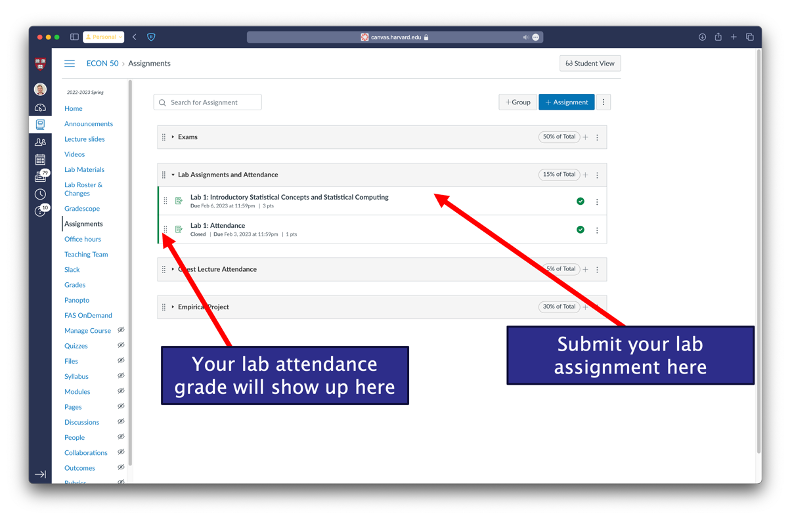 |
| **Step 2** <br><br> Access Gradescope from Canvas| 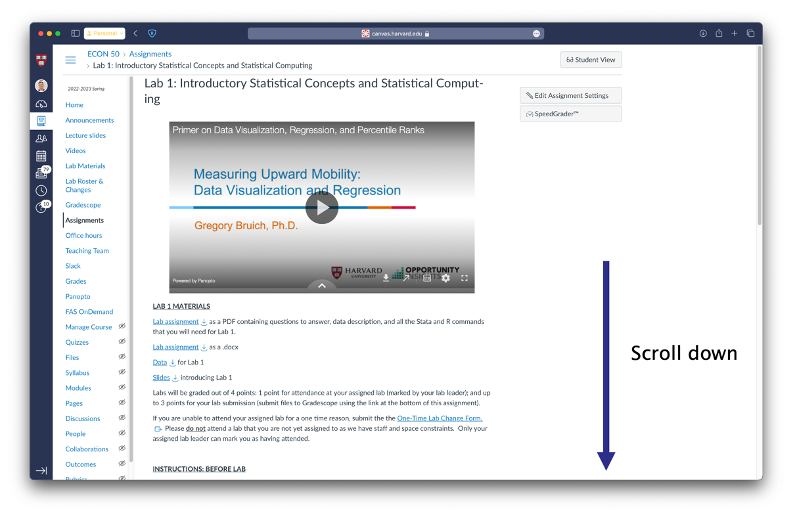 <br> 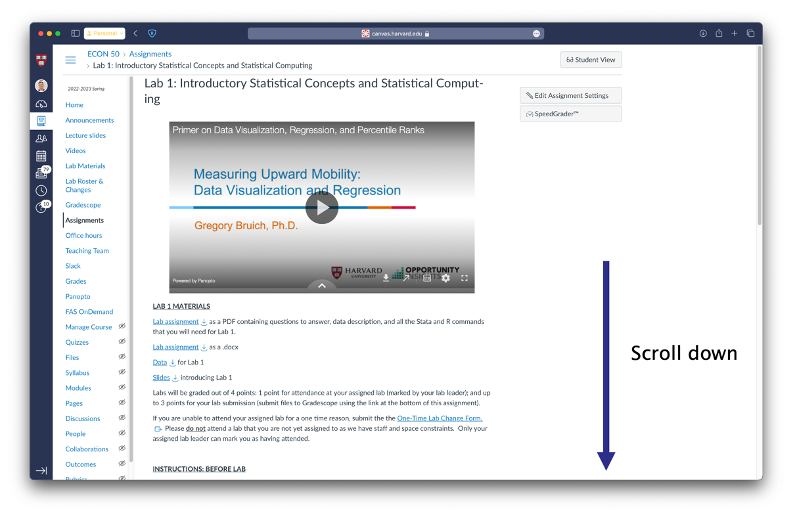|
| **Step 3** <br><br> Access the lab assignment on Gradescope| 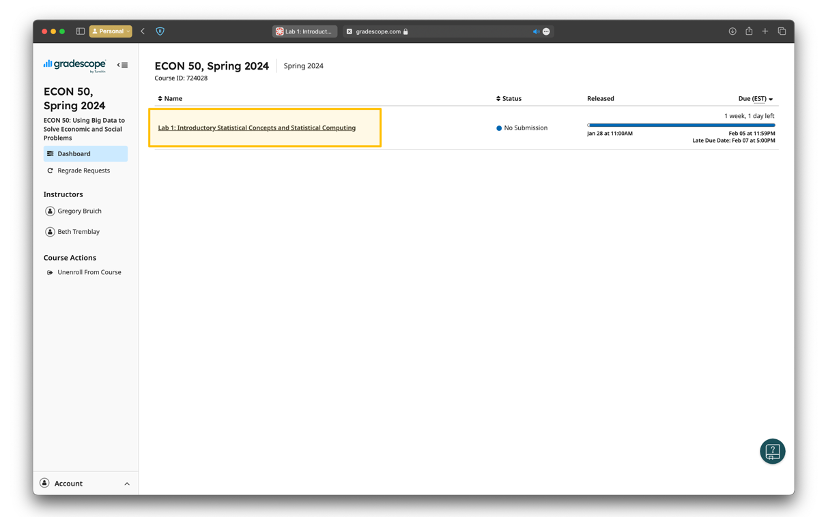 |
| **Step 4** <br><br> Upload your files<br><br> *Check [What files to submit](#What-files-to-submit) to confirm what files you need to submit.*| 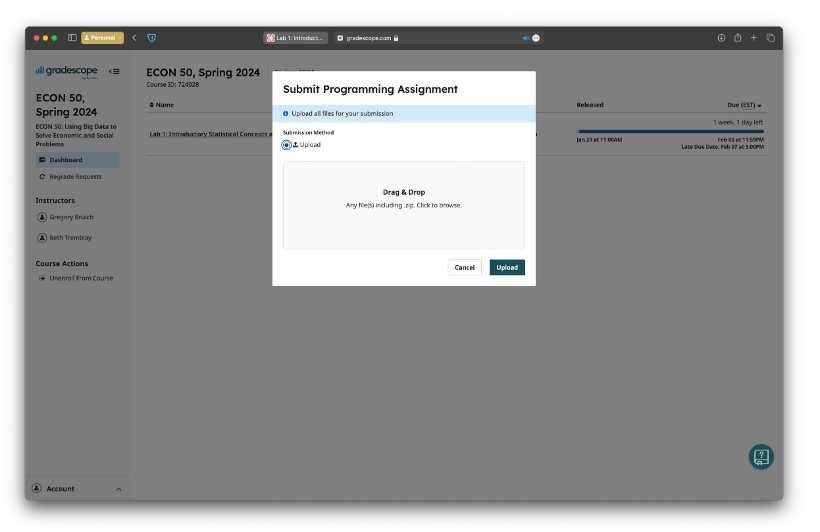 |
| **Step 5** <br><br> What you’ll see after submitting your lab assignment| 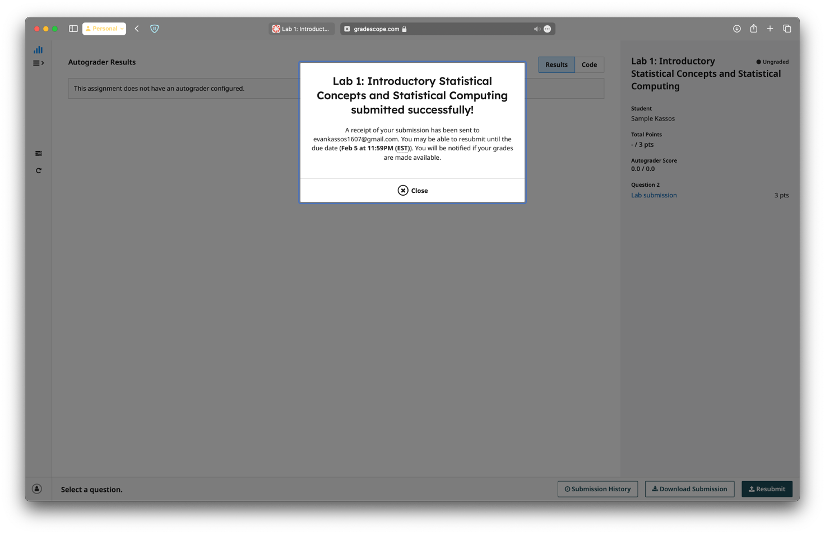 |
| **Step 6** <br><br> Check your submitted files| 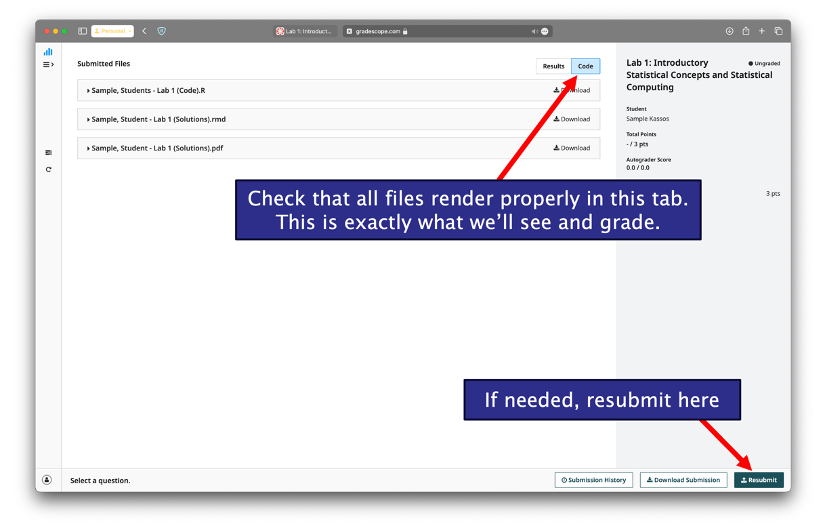 |
| **Step 7** <br><br> You’ll receive an email confirmation as well| 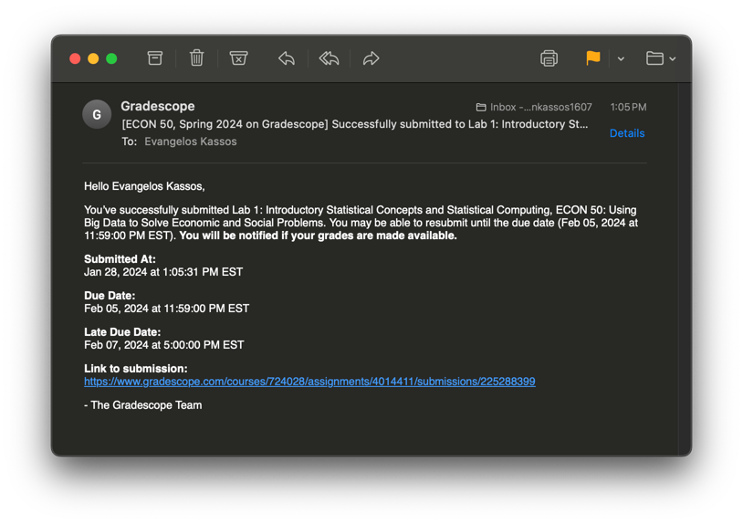 |

## What files to submit

|  |  |
|--|--|
| **If you’re using Python Notebook to write your R code, and a document editor to write your answers** <br><br> 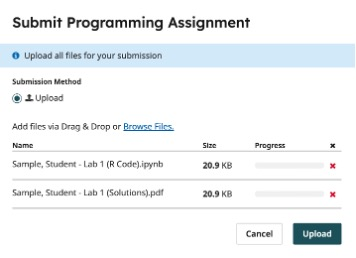| <ul><li>Submit your .ipynb R code file replicating all your analyses above (with enough comments that a principal investigator on a research project would be able to follow and understand what each step of the code is doing). We need your raw code so that we can run your code ourselves if needed.</li><li>Submit your answers as a .pdf file. **Do not submit a .doc/.docx file (Word document)**, as we are unable to read those files on Gradescope.</li></ul><br>_For graphs, always be sure to save them as images (e.g., .png files) and insert them into the answer document even if it was not explicitly asked._<br><br>**Important:** If we do not have both your .ipynb code and .pdf answer files, you will lose 1 out of the 3 lab assignment points.<br><br><span style="color:crimson">**Word of caution:**</span> <u>**Do not**</u> use Python to perform your analysis in this Lab, unless when explicitly instructed. You will receive no points if you’re not using R or Stata for your analysis.|
| **If you’re using a Python Notebook to write your R code AND to write your answers** <br><br> 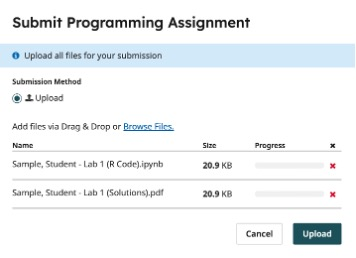| <ul><li>Submit your .ipynb R code file replicating all your analyses above (with enough comments that a principal investigator on a research project would be able to follow and understand what each step of the code is doing). We need your raw code so that we can run your code ourselves if needed.</li><li>Submit the .pdf version of your .ipynb file.</li></ul><br>_For graphs, always be sure to save them as images (either in the cell output or as separate images, such as .png files) and insert them into the answer document even if it was not explicitly asked._<br><br>**Important:** If we do not have both your .ipynb code and .pdf answer files, you will lose 1 out of the 3 lab assignment points.<br><br>**Do not submit ONLY the .ipynb file**, as we might have trouble reading your answers using those files on Gradescope.<br><br><span style="color:crimson">**Word of caution:**</span> <u>**Do not**</u> use Python to perform your analysis in this Lab, unless when explicitly instructed. You will receive no points if you’re not using R or Stata for your analysis.|png)|

## WHAT ARE DO-FILES AND .R FILES AND WHY DO WE NEED ONE?<span id="Dofiles" class="anchor"></span>

*Let’s imagine the following situation - you just found out you have to
present your results to a partner– all the averages you produced and
comparisons you made. Suppose you also found out that the data you had
used to produce all these results was not completely clean, and have
only just fixed it. You now have incorrect numbers and need to re-do
everything.*

*How would you go about it? Would you reproduce everything you did for
Lab 1 from scratch? Can you do it? How long would it take you to do?
Just re-typing all those commands into Stata or R in order and checking
them would take an hour.*

*An important feature of any good research project is that the results
should be reproducible. For Stata and R the easiest way to do this is to
create a text file that lists all your commands in order, so anyone can
re-run all your Stata or R work on a project anytime. Such text files
that are produced within Stata or linked to Stata are called do-files,
because they have an extension .do (like intro_exercise.do). Similarly,
in R, these files are called .R files because they have an extension of
.R. These files feed commands directly into Stata or R without you
having to type or copy them into the command window.*

*An added bonus is that having do-files and .R files makes it very easy
to fix your typos, re-order commands, and create more complicated chains
of commands that wouldn’t work otherwise. You can now quickly reproduce
your work, correct it, adjust it, and build on it.*

*Finally, do-files and .R files make it possible for multiple people to
work on a project, which is necessary for collaborating with others or
when you hand off a project to someone else.*

## DATA DESCRIPTION, FILE: holc.dta

The data consist of 53 cities with 1930s population between 30,000 and
50,000 for a total of 581 observations. We observe these 53 cities in 11
Censuses (1910-2010). These data were generously provided by Professors
Daniel Aaronson and Daniel Hartley at the Federal Reserve Bank of
Chicago. For more details on the construction of these data and
background on the HOLC Redlining, see [<u>Aaronson, Hartley, and
Mazumder
(2021)</u>](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3038733).

**TABLE 1**<span id="Table-A" class="anchor"></span>

Variable Definitions

| *Variable* <br> *(1)*  | *Description*  <br> *(2)*                                |*Obs.* <br> *(3)* | *mean* <br> *(4)*       | *sd* <br> *(5)*      | *min*  <br> *(6)*       |   *max*  <br> *(7)*      |
|------------------------|----------------------------------------------------------|--------|---------|--------|---------|---------|
| *city_m*               | Name of city (string)                                    | 581    | n/a     | n/a    | n/a     | n/a     |
| *city_id*              | Numeric city identifier (1-53)                           | 581    | n/a     | n/a    | 1       | 53      |
| *year*                 | Year                                                     | 581    | 1960    | 31.70  | 1910    | 2010    |
| *pop_1930*             | 1930 population                                          | 581    | 39,400  | 5,952  | 30,729  | 48,764  |
| *ownhome*              | Home ownership rate                                      | 572    | 0.513   | 0.114  | 0.179   | 0.740   |
| *holc_map*             | 1 if HOLC drew “redlining map” for city, and 0 otherwise | 581    | 0.511   | 0.500  | 0       | 1       |
| *shraa*                | Share African-American                                   | 518    | 0.0971  | 0.118  | 0       | 0.616   |
| *median_gross_rent*    | Median gross rent                                        | 415    | 503.9   | 213.5  | 76.07   | 1,688   |
| *median_house_value*   | Median house value                                       | 417    | 104,468 | 99,178 | 7,783   | 969,200 |
| *median_contract_rent* | Median contract rent                                     | 466    | 472.5   | 191.3  | 76.07   | 1,627   |
| *pop*                  | City's population in current year                        | 258    | 78,135  | 78,020 | 20,226  | 520,116 |
| *foreign_born*         | Share foreign-born                                       | 469    | 0.0987  | 0.101  | 0.00400 | 0.557   |
| *employment*           | Employment rate                                          | 159    | 0.734   | 0.0960 | 0.385   | 0.902   |
| *nonwhite*             | Share non-white                                          | 571    | 0.133   | 0.143  | 0       | 0.728   |
| *median_rent*          | Median rent                                              | 257    | 400.9   | 138.9  | 76.07   | 910.9   |
| *labforce*             | Labor Force Participation                                | 212    | 0.571   | 0.0395 | 0.469   | 0.685   |
| *read_write*           | Fraction Literate                                        | 159    | 0.958   | 0.0401 | 0.728   | 0.998   |
| *mortgage*             | Fraction with a Mortgage                                 | 106    | 0.399   | 0.150  | 0.0212  | 0.778   |
| *radio*                | Share with Radio                                         | 53     | 0.416   | 0.151  | 0.0797  | 0.796   |
| *rent*                 | Mean Rent                                                | 106    | 498.6   | 653.5  | 172.6   | 6,501   |


**TABLE 2**<span id="Table-2" class="anchor"></span>

R Commands

<table>
<tr>
<td> <div style="width:700px"><b>R command</b> </div></td> <td> <div style="width:600px"><b>Description</b> </div> </td>
</tr>
<tr>
<td> 
    
```Rscript
#clear the workspace
rm(list=ls()) # removes all objects from the environment 

#Install and load haven package
if (!require(haven)) install.packages("haven"); library(haven) 

#Load stata data set
download.file("https://raw.githubusercontent.com/ekassos/ec50_s24/main/holc.dta", "holc.dta", mode = "wb")
star <- read_dta("holc.dta") 

#Report detailed information on all variables 
summary(dat)

```

</td>
<td>
This sequence of commands shows how to open Stata datasets in R.  The first block of code clears the work space.  The second block of code installs and loads the “haven” package.  The third block of code downloads and loads in holc.dta.
<br><br>
The summary command will report information on what is included in the data set loaded into memory, including information on the number of missing observations NAs for each variable.
</td>
</tr>
<tr>
<td> 
    
```Rscript
#Create running variable, centered at 1930 population = 40000 
dat$dist_from_cut <- dat$pop_1930 - 40000
```

</td>
<td> 
This code shows how to create a new variable <code>dist_from_cut</code> the equals 1930 population minus the threshold 40000. 
</td>
</tr>
<tr>
<td> 
    
```Rscript
#Load packages
if (!require(tidyverse)) install.packages("tidyverse"); library(tidyverse)
if (!require(rdrobust)) install.packages("rdrobust"); library(rdrobust)

#Subset data to observations in years 1940 to 2010
narrow <- subset(dat,year<=2010 & year>=1940)

#draw binned scatter plot with linear fit
rdplot(dat_narrow$yvar, #outcome variable
       dat_narrow$dist_from_cut, #running variable
        p = 1, 
        nbins = c(20, 20), 
        binselect = "es", 
        y.lim = c(0, 1.1), 
        x.label = "City Population in 1930 minus 40,000", 
        y.label = "Outcome variable (yvar)"
       )

#Save graph
ggsave("figure1_linear.png")

```

</td>
<td> 
The first command installs rdrobust, which only has to be done once.  
<br><br>
The second command subsets the data to only observations with dist_from_cut between -1.2 and 1.2.  
<br><br>
The third block of code produces a binned scatter plot of yvar against dist_from_cut with a linear best fit line.  The options shown are:

```Rscript
p = 1, #p = 1 is linear best fit line. p = 2 is quadratic
nbins = c(20, 20), #number of bins on each side of threshold
binselect = "es", #option to use "equal spaced" binning
y.lim = c(0, 1.1), #Set y-axis scale
x.label = "City Population in 1930 minus 40000", #x axis label
y.label = "Outcome variable (yvar)" #y axis label
```

The fourth block of code saves the graph.

</td>
</tr>
<tr>
<td> 
    
```Rscript
#Load packages
if (!require(sandwich)) install.packages("sandwich"); library(sandwich)
if (!require(lmtest)) install.packages("lmtest"); library(lmtest)

#Create running variable, centered at 1930 population = 40000 
dat$dist_from_cut <- dat$pop_1930 - 40000

#Create indicator for being above probation threshold
dat$above <- 0
dat$above[which(dat$dist_from_cut >= 0)] <- 1

#Interact dist_from_cut with non-probation
dat$interaction <- dat$dist_from_cut*dat$above

##Subset data to [1940,2010] with new variables added
dat_narrow <- subset(dat, year<=2010 & year>=1940)

#Estimate regression
linear <- lm(yvar ~ above + dist_from_cut + interaction , data = dat_narrow)

#Report coefficients and standard errors
coeftest(linear, vcovCL(linear, cluster = dat_narrow$city_id))
```

</td>
<td> 
These commands show how to run a regression to quantify the discontinuity in yvar at the 1.60 GPA threshold.  We first create a new variable dist_from_cut the equals 1930 population minus the threshold 40000.  
<br><br>
We then generate an indicator variable above for dist_from_cut being positive.  We next generate a variable interaction that is the product between dist_from_cut and the indicator.  
<br><br>
Then we subset the data to a new data frame with year between 1940 and 2010.  
<br><br>
Finally, we run a regression of yvar on these three variables, restricting the regression to observations with year between 1940 and 2010.  The coefficient of interest is coefficient on T, the indicator for being above probation threshold.  
<br><br>
The <code>vcovCL()</code> function computes standard errors that take into account that there are repeated observations on each city.
</td>
</tr>
<tr>
<td> 
    
```Rscript
#Create indicator for treated city
dat$treat <- ifelse(dat$pop_1930>40000, 1, 0)
mean(dat$treat)
```

</td>
<td> 
This code shows how to create a new variable treat that equals 1 for the treated cities and 0 for all other cities.   Note that this is exactly the same as the variable above defined earlier.
</td>
</tr>
<tr>
<td> 
    
```Rscript
#install ggplot and statar packages
if (!require(tidyverse)) install.packages("tidyverse"); library(tidyverse)
if (!require(ggplot2)) install.packages("ggplot2"); library(ggplot2)

#Bin scatter plot – connected dots
ggplot(dat, 
       aes(x=year,y=yvar, 
           colour = factor(treat, labels = c("1930 pop < 40K", "1930 pop > 40K")), 
           shape = factor(treat, labels = c("1930 pop < 40K", "1930 pop > 40K")))) +
  geom_vline(xintercept=1935) +
  stat_summary(fun = "mean",geom="point") +
  stat_summary(fun = "mean",geom="line")  +
  labs(x = "Year", y = "y-axis title", shape = "", colour = "") +
  theme(legend.position="bottom")

#Save graph
ggsave("binscatter_connected.png")
```

</td>
<td> 
The first command loads the tidyverse and ggplot libraries.  The second block of code a binned scatter plot of yvar against year with separate dots and lines for the cities with treat = 0 and treat = 1.  The options shown are:<br><br>
1.	shape = factor() will show separate binned averages and lines for each value of the variable treat using different shapes to connect the binned averages<br>
2.	colour = factor() will make the lines and connectors different colors based on the variable treat<br>
3.	geom_vline() as a vertical line<br>
4.	stat_summary() divides the data into groups based on the discrete values of the x-axis variable (year) for purposes of binning and reports means with geom="point" and lines with geom="line"<br>
5.	labs() adds axis labels<br>
6.	theme(legend.position="bottom") puts the legend at the bottom instead 
<br><br>
The last line saves the graph.  

</td>
</tr>
<tr>
<td> 
    
```Rscript
#Summary stats for one variable
mean(dat$yvar, na.rm=TRUE)

#Summary stats for observations with dvar==1 and year in 1910-1930
#Subset data
new_df <- subset(dat, dvar == 1 & year >= 1910 & year <= 1930)

#Report mean
mean(new_df$yvar, na.rm=TRUE)

#Alternatively, do it all at once using the with() function
with(subset(dat, dvar == 1 & year >= 1910 & year <= 1930), mean(yvar, na.rm=TRUE))
```

</td>
<td> 
We used these commands in Lab 1. These commands report mean of yvar.  The first line calculates these statistics across the full sample. 
<br><br>
The other lines illustrate how to calculate these statistics for observations meeting certain criteria: when another variable in the data is equal to 1 AND the variable year is between 1910 and 1930. 
<br><br>
The subset() function will pick out only the observations in a data frame that meet certain criteria.  One way to proceed is to create a new data frame and then apply the mean() function to yvar in this new data frame.  The second way to proceed is to do it all at once using the with() function.  The with() function in R takes two arguments: a data frame and an expression.  The data frame argument is dat and the expression applies the mean() function to the variable yvar: mean(yvar).

</td>
</tr>
<tr>
<td> 
    
```Rscript
#Load packages
if (!require(sandwich)) install.packages("sandwich"); library(sandwich)
if (!require(lmtest)) install.packages("lmtest"); library(lmtest)

#Create indicator for treated city
dat$treat <- ifelse(dat$pop_1930>40000, 1, 0)

#Create indicator for after HOLC maps drawn
dat$post <- ifelse(dat$year>=1940, 1, 0)

#Interact treat and post
dat$dd <- dat$treat*dat$post

#Data frame with subset of years and new variables generated
dat_narrow <- subset(dat, year>=1910 & year <= 1960)

#Estimate regression (all goes on one line)
reg1 <- lm(yvar ~ dd + post + treat, data=dat_narrow)

#Report coefficients and standard errors
coeftest(reg1, vcovCL(reg1, cluster = dat_narrow$city_id))
```

</td>
<td> 
These commands show how to run a simple differences in differences regression.  We first create a new variable treat that equals 1 for the treated cities and 0 for all other cities.  We then generate an indicator variable post for year being greater than or equal to 1940.  We next generate dd that is the product between post and treat.  Finally, we run a regression of yvar on these three variables and restrict it to years 1910 through 1960.  The coefficient of interest is coefficient on dd.  The <code>vcovCL()</code> option computes standard errors that takes into account that there are repeated observations on each city.
</td>
</tr>
<tr>
<td> 
    
```Rscript
#Estimate regression (all goes on one line)
reg2 <- lm(ownhome ~ dd + factor(year) + factor(city_id), 
           data=dat_narrow)

#Report coefficients and standard errors
coeftest(reg2, vcovCL(reg2, cluster = dat_narrow$city_id))
```

</td>
<td> 
These commands show how to run a differences in differences style regression with separate indicators for each year and each city.  The factor(year) term in the regression generates the indicators for each year automatically.  The fator(city_id) term generates the indicators for each city automatically.  The <code>vcovCL()</code> option computes standard errors that takes into account that there are repeated observations on each city.
</td>
</tr>
</table>